Task1: Descriptive Analysis, Unsupervised Learning – IKEA


In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",None,"display.max_columns", None)

Installing necessary libraries

In [2]:
!pip install openpyxl

You should consider upgrading via the 'c:\users\study\onedrive\desktop\du\business_intelligence\labs\venv\scripts\python.exe -m pip install --upgrade pip' command.


Load the data

In [3]:
ikea = pd.read_excel('ikea_dataset.xlsx')
ikea.head(4) 

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0


Exploring our dataset
checking summary, structure

In [4]:
ikea.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [5]:
ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 19.5+ KB


Dropping unneccesary columns

In [6]:
df = ikea.drop(["Kommun_code", "Year", "Kommun_name"], axis = 1)
df_name = ikea["Kommun_name"]
df.head()
df_name.head(6)

0         Haparanda
1            Kalmar
2          Karlstad
3    Upplands Väsby
4        Vallentuna
5         Österåker
Name: Kommun_name, dtype: object

Performing PCA for dimensionality reduction


Using sklearn library we perform PCA
First we scale our dataset to apply PCA. Then we create a PCA object and fit PCA on the scaled data

In [7]:
!pip install sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_scale = pd.DataFrame(scale.fit_transform(df),columns= df.columns)
df_scale.head(4)

You should consider upgrading via the 'c:\users\study\onedrive\desktop\du\business_intelligence\labs\venv\scripts\python.exe -m pip install --upgrade pip' command.


,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,0.017184,-0.169244,-0.366968,-0.274285,-0.639005,3.738817,0.017184,-0.225303,4.987484
1,1.025973,0.752206,0.423730,0.282274,1.015597,0.922074,1.025973,-0.225303,-0.200502
2,1.312392,0.950198,0.767521,0.601858,1.419745,1.010780,1.312392,-0.225303,-0.200502
3,0.124312,0.126716,0.071126,-0.016780,0.369223,0.187793,0.124312,-0.225303,-0.200502


In [8]:
pca_obj = PCA()
df_pca = pd.DataFrame(pca_obj.fit_transform(df_scale))
df_pca.head(4)

,0,1,2,3,4,5,6,7,8
0,-0.442137,6.220053,-0.046862,-0.486328,0.648428,-0.024058,-0.086199,0.015854,-1.212017e-09
1,1.748724,0.382760,-1.056933,0.397704,0.103466,0.634153,-0.101138,0.000954,-9.380016e-10
2,2.457948,0.387208,-1.303152,0.354918,0.243890,0.586173,-0.056098,0.073620,-6.994087e-10
3,0.243091,-0.066118,-0.469815,0.106233,0.049251,0.115306,0.018419,-0.057640,1.064760e-10


Using the explained_variance_ratio_ attribute we check the number of components which explain 90-95% of total variance. A per below output we choose 4 components

In [9]:
explained_sum = 0
for i in range(len(pca_obj.explained_variance_ratio_)):
    current = pca_obj.explained_variance_ratio_[i]
    explained_sum += current
    print("Components: ", i + 1, "Explained ratio: ", explained_sum)

Components:  1 Explained ratio:  0.5942276682788568
Components:  2 Explained ratio:  0.7231512074707149
Components:  3 Explained ratio:  0.82552455298592
Components:  4 Explained ratio:  0.9190319849389009
Components:  5 Explained ratio:  0.9920352577426784
Components:  6 Explained ratio:  0.9980220508748039
Components:  7 Explained ratio:  0.9995220569931347
Components:  8 Explained ratio:  1.0000000000000002
Components:  9 Explained ratio:  1.0000000000000002


In [10]:
!pip install yellowbrick

You should consider upgrading via the 'c:\users\study\onedrive\desktop\du\business_intelligence\labs\venv\scripts\python.exe -m pip install --upgrade pip' command.


Using K-means draw the elbow plot and from below elbow plot we can see that elbow is at 4 

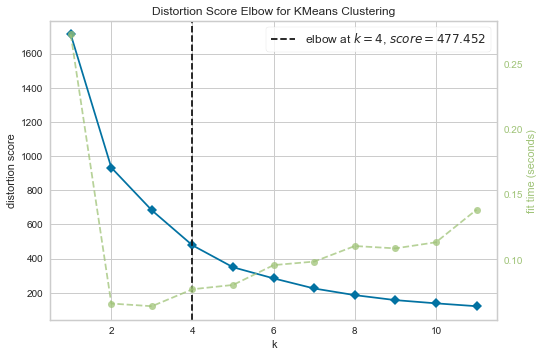

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
df_pca_best = df_pca.iloc[:,0:4]

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df_pca_best)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Now we create the clusters using the K_means and append it with the orignal dataset

In [12]:

# Set the seed to 1000
#checking unique values for each cluster
kmeans_4 = KMeans(n_clusters = 4, random_state = 1000).fit(df_pca_best)
unique, counts = np.unique(kmeans_4.labels_, return_counts = True)

dict(zip(unique, counts))

{0: 33, 1: 1, 2: 165, 3: 8}

appending clusters with orignal dataset

In [13]:
ikea["cluster"] = kmeans_4.labels_
ikea.head(5)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,3
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,2
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,2


Now we add the has_ikea column to see which kommun_name already has Ikeas. Logic here is to first insert FALSE has values in all 
fields. Then put the list of kommun_name (which is provided to us in the question) in an array and if that is equivalent to kommun_name, change it to TRUE.

In [14]:
ikea["has_ikea"] = False
ikea.head(6)


,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,3,False
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,0,False
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,0,False
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,2,False
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,2,False
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,2,False


In [15]:
has_ikea = "Borlänge, Gävle, Göteborg, Haparanda, Helsingborg, Jönköping, Kalmar, Karlstad, Linköping, Malmö, Stockholm, Sundsvall, Uddevalla, Umeå, Uppsala, Västerås, Älmhult, Örebro"
has_ikea = has_ikea.split(", ")
has_ikea

['Borlänge',
 'Gävle',
 'Göteborg',
 'Haparanda',
 'Helsingborg',
 'Jönköping',
 'Kalmar',
 'Karlstad',
 'Linköping',
 'Malmö',
 'Stockholm',
 'Sundsvall',
 'Uddevalla',
 'Umeå',
 'Uppsala',
 'Västerås',
 'Älmhult',
 'Örebro']

In [16]:
for i in has_ikea:
    ikea.loc[ikea["Kommun_name"]== i, "has_ikea"] = True
ikea.loc[ikea["has_ikea"]]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,3,True
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,0,True
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,0,True
19,180,2010,Stockholm,32897,18795,847073,191585,0.226173,87.71780,3389.665819,1,0,1,True
33,380,2010,Uppsala,7042,3391,197787,40476,0.204644,104.07394,725.598890,0,0,0,True
52,580,2010,Linköping,5348,2280,146416,26023,0.177733,117.55208,551.051245,0,0,0,True
64,680,2010,Jönköping,5298,2556,127382,16750,0.131494,103.87831,545.899307,0,0,0,True
75,765,2010,Älmhult,847,853,15603,1511,0.096840,49.76318,87.273823,0,0,2,True
117,1280,2010,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,0,True
120,1283,2010,Helsingborg,5528,3244,129177,16395,0.126919,85.40061,569.598220,1,0,0,True


Lastly, we analyze the clusters. We can see that cluster 0 is with the highest population, mean of 89434 

In [17]:
ikea.loc[ikea["cluster"]==0].describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster
count,33.000000,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.0,33.0
mean,840.969697,2010.0,3575.424242,1642.636364,89434.000000,13788.181818,0.150760,116.501415,368.407251,0.060606,0.0,0.0
std,580.087897,0.0,2250.710763,1117.781671,53811.244239,10074.192903,0.050743,32.166958,231.910428,0.242306,0.0,0.0
min,123.000000,2010.0,11.000000,2.000000,5221.000000,301.000000,0.057652,84.567850,1.133426,0.000000,0.0,0.0
25%,184.000000,2010.0,2191.000000,1010.000000,62815.000000,8734.000000,0.119520,103.878310,225.757905,0.000000,0.0,0.0
50%,780.000000,2010.0,3268.000000,1486.000000,82608.000000,10919.000000,0.138757,111.461210,336.730641,0.000000,0.0,0.0
75%,1380.000000,2010.0,4560.000000,2035.000000,103294.000000,16038.000000,0.177733,119.647940,469.856708,0.000000,0.0,0.0
max,1880.000000,2010.0,11217.000000,5740.000000,298963.000000,50084.000000,0.269646,275.636330,1155.785679,1.000000,0.0,0.0


In [18]:
ikea.loc[ikea["cluster"]==1]


,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
19,180,2010,Stockholm,32897,18795,847073,191585,0.226173,87.7178,3389.665819,1,0,1,True


In [19]:
ikea.loc[ikea["cluster"]==2].describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster
count,165.000000,165.0,165.000000,165.00000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.0
mean,1063.060606,2010.0,352.751515,201.29697,19735.345455,1882.539394,0.087206,85.495953,36.347076,0.042424,0.0,2.0
std,508.995827,0.0,397.915244,219.84463,13222.116837,1583.822959,0.027682,23.133799,41.000690,0.202169,0.0,0.0
min,114.000000,2010.0,11.000000,10.00000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.0,2.0
25%,642.000000,2010.0,93.000000,54.00000,10288.000000,746.000000,0.067121,73.503020,9.582604,0.000000,0.0,2.0
50%,1263.000000,2010.0,190.000000,116.00000,14926.000000,1242.000000,0.082552,86.362900,19.577363,0.000000,0.0,2.0
75%,1460.000000,2010.0,516.000000,269.00000,26304.000000,2657.000000,0.101200,98.757400,53.167996,0.000000,0.0,2.0
max,1882.000000,2010.0,2004.000000,1109.00000,77054.000000,6776.000000,0.211698,180.416500,206.489659,1.000000,0.0,2.0


In [20]:
ikea.loc[ikea["cluster"]==3].describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster
count,8.00000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.0,8.0
mean,1744.75000,2010.0,561.625000,256.625000,11969.500000,928.500000,0.073015,111.485212,57.869139,0.0,1.0,3.0
std,370.69115,0.0,420.550299,187.693472,6223.788695,650.439412,0.015736,38.525039,43.332978,0.0,0.0,0.0
min,1435.00000,2010.0,112.000000,42.000000,4692.000000,301.000000,0.049977,73.580270,11.540340,0.0,1.0,3.0
25%,1474.00000,2010.0,239.000000,155.500000,9522.250000,536.250000,0.062650,91.654403,24.626262,0.0,1.0,3.0
50%,1733.50000,2010.0,474.000000,255.000000,10933.500000,792.500000,0.070619,95.320925,48.840368,0.0,1.0,3.0
75%,1769.75000,2010.0,739.000000,277.500000,12381.000000,1077.500000,0.089187,120.234522,76.145638,0.0,1.0,3.0
max,2583.00000,2010.0,1281.000000,667.000000,26034.000000,2375.000000,0.091227,195.741740,131.992641,0.0,1.0,3.0


Since cluster 0 is the biggest cluster, we can just choose the top 3 candidates from that.
My idea is to select top 10 values from cluster 0 and the sorting them on the basis of employment rate (Employee/Population). 
We do this as placing Ikea will create more jobs and we may be motivated to place them in places with lowest employment rate.

In [21]:
cluster0 = ikea.loc[(ikea["cluster"]==0) & (ikea["has_ikea"]==0)]
top10 = cluster0.sort_values("Population").tail(n=10)
top10


,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea
10,127,2010,Botkyrka,1469,530,82608,8023,0.097121,138.90558,151.363926,0,0,0,False
77,780,2010,Växjö,3268,1315,83005,12266,0.147774,124.54608,336.730641,0,0,0,False
20,181,2010,Södertälje,2191,894,86246,8734,0.101268,122.82270,225.757905,0,0,0,False
21,182,2010,Nacka,3104,1489,90108,17871,0.198329,104.47221,319.832286,0,0,0,False
130,1380,2010,Halmstad,3196,1437,91800,11604,0.126405,111.46121,329.311851,0,0,0,False
42,484,2010,Eskilstuna,2844,1485,96311,9898,0.102771,95.97915,293.042210,0,0,0,False
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,0,False
173,1490,2010,Borås,3365,1486,103294,10919,0.105708,113.48541,346.725400,0,0,0,False
118,1281,2010,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0,0,False
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,0,False


In [22]:
top10["emp_rate"] = top10.Employee.div(top10.Population)
top10
top10.sort_values("emp_rate")

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster,has_ikea,emp_rate
10,127,2010,Botkyrka,1469,530,82608,8023,0.097121,138.90558,151.363926,0,0,0,False,0.006416
20,181,2010,Södertälje,2191,894,86246,8734,0.101268,122.82270,225.757905,0,0,0,False,0.010366
118,1281,2010,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0,0,False,0.014128
173,1490,2010,Borås,3365,1486,103294,10919,0.105708,113.48541,346.725400,0,0,0,False,0.014386
42,484,2010,Eskilstuna,2844,1485,96311,9898,0.102771,95.97915,293.042210,0,0,0,False,0.015419
130,1380,2010,Halmstad,3196,1437,91800,11604,0.126405,111.46121,329.311851,0,0,0,False,0.015654
77,780,2010,Växjö,3268,1315,83005,12266,0.147774,124.54608,336.730641,0,0,0,False,0.015842
21,182,2010,Nacka,3104,1489,90108,17871,0.198329,104.47221,319.832286,0,0,0,False,0.016525
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,0,False,0.020223
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,0,False,0.024360


From the map we see Huddige is next to Stockholm, Nörrköping is next to Linköping. But any other city should be fine to place an Ikea and above data we can conclude Botkyrka, Södertälje and Lund are top 3 cities with lowest employment rate.
So the we finally decide to place Ikea below places

Botkyrka, Södertälje and Lund